## Question 1 

### Enviornment Setup:
Easiest way to run this is using Google Colab:
https://colab.research.google.com/drive/1pXOhnbCG_tHUmtp6lOFY30H4_4tdWt4J?usp=sharing

Go to Runtime, then Run All


For Local Run, Best way is to set up Jupyter Notebook in the PC.
Requirement:
1. Jupyter Notebook: https://jupyter.org/install
2. Python 3.8

Another way is:
download as .py file from the File tab on this site, then run on any Python IDE


### Package Installation

In [ ]:
try:
    import yfinance as yf    # import  Yahoo! Finance
    import random            # random number generator
    import pandas as pd
    import numpy as np
except:
    !pip install yfinance    # install Yahoo! Finance
    !pip install pandas
    !pip install numpy
    import yfinance as yf
    import random
    import pandas as pd
    import numpy as np    

     |████████████████████████████████| 6.4 MB 6.1 MB/s 
     |████████████████████████████████| 63 kB 704 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


###(A) Download price time series history from 2017-Jan to 2021-Dec. There are publicly available data sources and even APIs, free of charge, e.g., Yahoo Finance.

In [ ]:
# Yahoo Finance Ticker, here CAD = X means USD/CAD
tickers = ['XIU.TO', 'SPY','CAD=X']

In [ ]:
# Retrieve 15 years historical daily data
yf_period = "15y"  
yf_interval = "1d"

In [ ]:
#  1.  Create dataframe **yf_price** with **yf.download**
yf_price = yf.download(
        tickers = tickers,       # tickers list or string as well
        period = yf_period,      # optional, default is '1mo'
        interval = yf_interval,  # fetch data by interval
        group_by = 'ticker',     # group by ticker
        auto_adjust = True,      # adjust all OHLC (open-high-low-close)
        prepost = True,          # download market hours data
        threads = True,          # threads for mass downloading
        proxy = None)            # proxy

#  2.  Select 'Close' (price at market close) column only
yf_price = yf_price.iloc[:, yf_price.columns.get_level_values(1) == 'Close']
yf_price = round(yf_price[tickers],6)

#  3.  Remove the dataframe multi-index
yf_price.columns = yf_price.columns.droplevel(1)   

[*********************100%***********************]  3 of 3 completed


Note that due to different exchange's off season, drop the data with NaN.
aka NYSE and TMX have different opeating days during a year

In [ ]:
# Retrieve Histrorical Data from 2017 to 2021

df = yf_price.iloc[1: , :]
df = df.reset_index()  
df = df.loc[df['Date'] >= '2017-01-01'].loc[df['Date'] <= '2021-12-31']
df = df.dropna().reset_index(drop=True)  
df

,Date,XIU.TO,SPY,CAD=X
0,2017-01-03,19.625797,205.509064,1.34414
1,2017-01-04,19.780672,206.731674,1.34218
2,2017-01-05,19.849497,206.567459,1.32990
3,2017-01-06,19.772066,207.306519,1.32294
4,2017-01-09,19.651613,206.622238,1.32418
...,...,...,...,...
1225,2021-12-22,32.071999,466.241577,1.29230
1226,2021-12-23,32.310455,469.142548,1.28512
1227,2021-12-29,32.519100,476.001251,1.28130
1228,2021-12-30,32.439617,474.685333,1.27826


In [ ]:
df.shape # Here we get 1230 single days of stock data 

(1230, 4)

In [ ]:
# Table of Stocks Daily Change from 2017 to 2022
df = round(df[tickers].pct_change(), 4)
df = df.dropna().reset_index(drop=True)
df

,XIU.TO,SPY,CAD=X
0,0.0079,0.0059,-0.0015
1,0.0035,-0.0008,-0.0091
2,-0.0039,0.0036,-0.0052
3,-0.0061,-0.0033,0.0009
4,0.0022,0.0000,-0.0021
...,...,...,...
1224,0.0069,0.0100,-0.0010
1225,0.0074,0.0062,-0.0056
1226,0.0065,0.0146,-0.0030
1227,-0.0024,-0.0028,-0.0024


### Part (B) & (C)
Now randomly pick 4 quarters of historical data (66 consecutive price data points or
65 consecutive daily returns) and stitch the returns to construct a one-year price time
series/path. Note that the same quarter can be used more than once and quarters can
overlap.

Since we invest in 2B CAD at the beginning, then it is necessory to transform the SPY from USD to CAD. 
In this period, the fluctuation of FX rate risk impact the porfolio return

In [ ]:
# Table of Cumulatative Return from 2017 to 2022
# Cumulative Return
df = df + 1
cumuReturn = df.cumprod()
cumuReturn['SPY_to_CAD'] = cumuReturn['SPY'] * cumuReturn['CAD=X']
cumuReturn

,XIU.TO,SPY,CAD=X,SPY_to_CAD
0,1.007900,1.005900,0.998500,1.004391
1,1.011428,1.005095,0.989414,0.994455
2,1.007483,1.008714,0.984269,0.992845
3,1.001337,1.005385,0.985155,0.990459
4,1.003540,1.005385,0.983086,0.988380
...,...,...,...,...
1224,1.635576,2.269252,0.960328,2.179226
1225,1.647680,2.283321,0.954950,2.180458
1226,1.658390,2.316657,0.952085,2.205656
1227,1.654409,2.310171,0.949800,2.194201


###(C) 5000 Scenrios for 260 Days Historical Simulation
Repeat the above step for 5000 times. At the end of this step, we have 5000 * 260 simulated prices or 5000 one-year price paths for the three risk factors, SPY, XIU and USD/CAD.

In [ ]:
# 5000 Simulations Tracking
XIU_sim, SPY_sim, FX_sim = [], [], []
# Year_End Simulation Result Tracking
XIU_yr_end, SPY_yr_end, FX_yr_end = [], [], []

for i in range(5000):
  # Empty dataframe representing random one year data
  yearSim = pd.DataFrame()

  for j in range(4):
    # Generate random numebr to represent the start day of a quarter
    # the Max start day = total # of days - 65
    startDay = random.randrange(0, df.shape[0] - 65)

    quarter = df.loc[startDay:startDay + 64]
    yearSim = yearSim.append(quarter, ignore_index = True)
    cumuReturn = yearSim.cumprod()
    cumuReturn = cumuReturn - 1 
  
  # Transform the real number to Percentage
  XIU_yr_end.append(round(cumuReturn['XIU.TO'].iloc[-1] * 100 , 2))
  SPY_yr_end.append(round(cumuReturn['SPY'].iloc[-1]* 100, 2))
  FX_yr_end.append(round(cumuReturn['CAD=X'].iloc[-1]* 100, 2))

  XIU_sim.append(round(cumuReturn['XIU.TO'] * 100, 2).values.tolist())
  SPY_sim.append(round(cumuReturn['SPY'] * 100, 2).values.tolist())
  FX_sim.append(round(cumuReturn['CAD=X'] * 100, 2).values.tolist())

print("XIU yr end percentage change, with", len(XIU_yr_end), "Scenerios in total")
print(XIU_yr_end)
print("SPY yr end percentage change, with", len(SPY_yr_end), "Scenerios in total")
print(SPY_yr_end)
print("USD/CAD yr end percentage change, with", len(FX_yr_end), "Scenerios in total")
print(FX_yr_end)

In [ ]:
print('One exampel shown above, XIU_sim is list of list, with', len(XIU_sim) , 'simulation serios \
and each scenerio include', len(XIU_sim[0]), 'Days of Data')

One exampel shown above, XIU_sim is list of list, with 5000 simulation serios and each scenerio include 260 Days of Data


### (D) Portfolio Return (%) Calculatation
Calculate the portfolio returns using the simulated risk factor returns from above. At
the end of this step, we have 5000 * 260 simulated portfolio PnLs (profit and loss) in
CAD dollar terms or in % return terms.

Explanation:
The portfolio is made of two assest with 50% on each

In [ ]:
weight1, weight2 = 0.5, 0.5

In [ ]:
Portfolio_Return = []
Alternative_Portfolio_Return = []

for i in range(5000):
  # Empty dataframe representing random one year data
  yearSim = pd.DataFrame()

  for j in range(4):
    # Generate random numebr to represent the start day of a quarter
    # the Max start day = total # of days - 65
    startDay = random.randrange(0, df.shape[0] - 65)

    quarter = df.loc[startDay:startDay + 64]
    yearSim = yearSim.append(quarter, ignore_index = True)
    cumuReturn = yearSim.cumprod()
    cumuReturn['SPY_to_CAD'] = cumuReturn['SPY'] * cumuReturn['CAD=X']
    cumuReturn['Portfolio_Return'] = cumuReturn['SPY_to_CAD'] * weight1 \
    + cumuReturn['XIU.TO'] * weight2
    cumuReturn = cumuReturn - 1 
  
  # ETL for (E)
  Portfolio_Return.append(round(cumuReturn['Portfolio_Return'].iloc[-1] * 100 , 2))

  # Alternative ETL for (F)
  Alternative_Portfolio_Return.append(round(cumuReturn['Portfolio_Return'].min() * 100 , 2))

print("Portofio yr end percentage change, with", len(Portfolio_Return), "Scenerios in total")
print(Portfolio_Return)
print("**********")
print("Portofio Max Loss, with", len(Alternative_Portfolio_Return), "Scenerios in total")
print(Alternative_Portfolio_Return)

### (E) 99% ETL Calculation (path independent)

In [ ]:
sortReturn = sorted(Portfolio_Return)
print('1% ETL:', round(sum(sortReturn[:50])/50, 2))

1% ETL: -26.08


### (F) Max 99% ETL Calculation (path dependent)

In [ ]:
sortReturn = sorted(Alternative_Portfolio_Return)
print('1% Max ETL:', round(sum(sortReturn[:50])/50, 2))

1% Max ETL: -38.23


## Questinon 2 (Risk Model Justification)


### 1) Data Visualization
### Imagine I am the CRO, I will first test and verify the data by looking at the data distribution generated from the risk engine implemented above and the statistics behind it to see if it is reasonable 

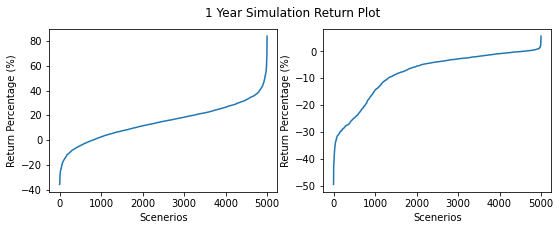

In [ ]:
from matplotlib import pyplot as plt

# Set the figure size
plt.figure(figsize=(9, 3))
plt.rcParams["figure.autolayout"] = True

# List of data points
index = [i for i in range(len(Portfolio_Return))] 

# Plot bar chart with data points
plt.suptitle('1 Year Simulation Return Plot')
plt.subplot(121)
plt.plot(index, sorted(Portfolio_Return))
plt.xlabel('Scenerios')
plt.ylabel('Return Percentage (%)')

plt.subplot(122)
plt.plot(index, sorted(Alternative_Portfolio_Return))
plt.xlabel('Scenerios')
plt.ylabel('Return Percentage (%)')
plt.show()

In [ ]:
df1 = pd.DataFrame(Portfolio_Return, columns=['Return %'])
df2 = pd.DataFrame(Alternative_Portfolio_Return, columns=['Return %'])

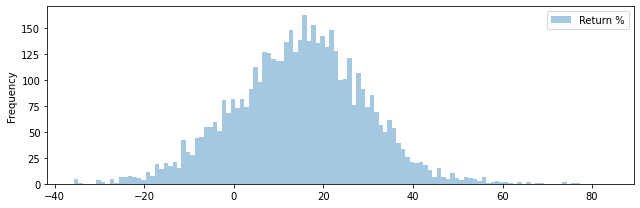

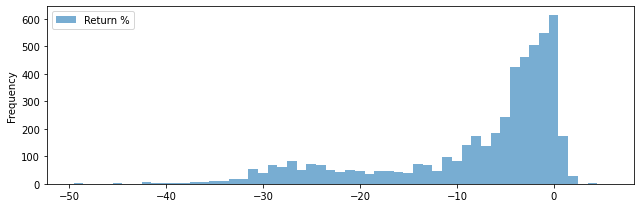

In [ ]:
bin_values = np.arange(start=df1['Return %'].min(), stop=df1['Return %'].max(), step=1)
df1.plot(kind='hist', bins=bin_values, figsize=[9,3], alpha=.4, legend=True)
bin_values = np.arange(start=df2['Return %'].min(), stop=df2['Return %'].max(), step=1)
df2.plot(kind='hist', bins=bin_values, figsize=[9,3], alpha=.6, legend=True)

### Result Justification and Discussion
From (E), we know if things goes bad for next year, then our porfolio is expected to lose 24.5% after one year. 

From (F), we know that for anytime next year, the maximum loss for our porfolio is expected to be 37.91%.

The risk engine implemented above used a combined approach of historical simulation and Monte Carlo Simulation. Historical data is from the 5 years' stock return data. Meanwhile, Random number generator in Python do follow a normal distribution [1]. Which could also be verified from the Return Frequency Chart above,  a bell curve is perfectly presented.


Currently, Historical simulation and Monte Carlo are two mainly used method for risk estimation, and the Pros and Cons could be found in the table below. By combining the two together, I believe the risk engine is doing a good job for risk estimation.


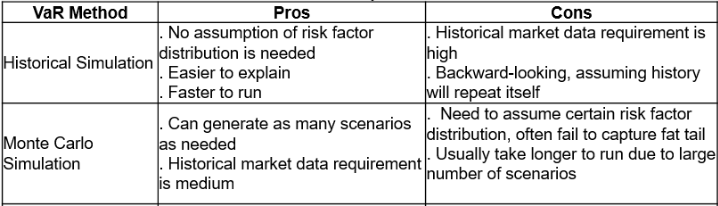

### Interesting Fact from verifying the result:

OTPP's net assests is **\$ 241.6B** (from 2021 Annual Report [2]), and we could find that the total asset risk ETL exposure is **\$ 58.0B ** for 2021, which is around 24%, similar to the result from (E), even thought the model implemented above is quite trival and simple.

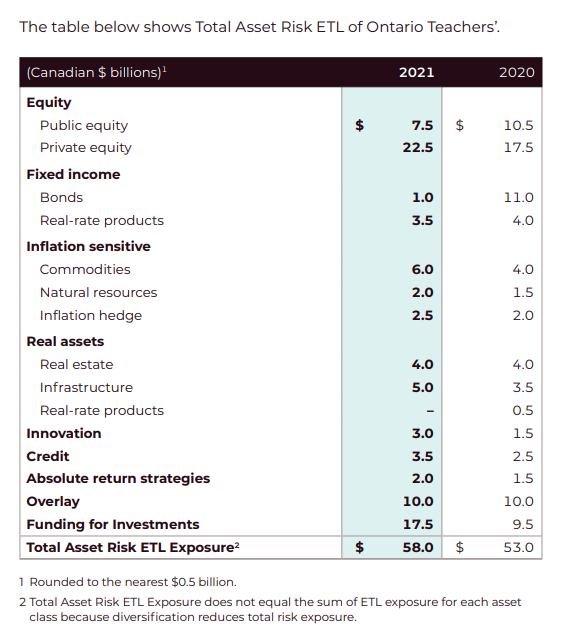


Reference: 
[1] https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

[2] https://www.otpp.com/content/dam/otpp/documents/otpp-2021-annual-report-eng.pdf
